In [ ]:
!pip install -q tflite-model-maker
!pip install -q tflite-support

     |████████████████████████████████| 616 kB 5.0 MB/s 
     |████████████████████████████████| 1.2 MB 57.1 MB/s 
     |████████████████████████████████| 6.4 MB 46.1 MB/s 
     |████████████████████████████████| 3.4 MB 42.4 MB/s 
     |████████████████████████████████| 120 kB 70.9 MB/s 
     |████████████████████████████████| 87 kB 7.8 MB/s 
     |████████████████████████████████| 1.1 MB 59.8 MB/s 
     |████████████████████████████████| 1.1 MB 60.9 MB/s 
     |████████████████████████████████| 596 kB 72.6 MB/s 
     |████████████████████████████████| 77 kB 7.4 MB/s 
     |████████████████████████████████| 840 kB 67.7 MB/s 
     |████████████████████████████████| 234 kB 63.2 MB/s 
     |████████████████████████████████| 25.3 MB 73.4 MB/s 
     |████████████████████████████████| 99 kB 9.7 MB/s 
     |████████████████████████████████| 352 kB 66.9 MB/s 
     |████████████████████████████████| 47.7 MB 107 kB/s 
     |████████████████████████████████| 462 kB 48.9 MB/s 
     |██████████████

In [ ]:
import numpy as np
import os
import pandas as pd

from tflite_model_maker.config import ExportFormat, QuantizationConfig
from tflite_model_maker import model_spec
from tflite_model_maker import object_detector

from tflite_support import metadata

import tensorflow as tf
assert tf.__version__.startswith('2')

tf.get_logger().setLevel('ERROR')
from absl import logging
logging.set_verbosity(logging.ERROR)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip '/content/drive/MyDrive/Doctodo/Teeth/XMLData.zip'

Archive:  /content/drive/MyDrive/Doctodo/Teeth/XMLData.zip
   creating: valid/
  inflating: valid/images.jpg        
  inflating: valid/images.xml        
  inflating: valid/T2.jpg            
  inflating: valid/T2.xml            
  inflating: valid/T3.jpg            
  inflating: valid/T3.xml            
  inflating: valid/UT108.jpg         
  inflating: valid/UT108.xml         
  inflating: valid/UT109.jpg         
  inflating: valid/UT109.xml         
  inflating: valid/UT110.jpg         
  inflating: valid/UT110.xml         
  inflating: valid/UT122.jpg         
  inflating: valid/UT122.xml         
  inflating: valid/UT123.jpg         
  inflating: valid/UT123.xml         
  inflating: valid/UT123_2.jpg       
  inflating: valid/UT123_2.xml       
  inflating: valid/UT124.jpg         
  inflating: valid/UT124.xml         
  inflating: valid/UT125.jpg         
  inflating: valid/UT125.xml         
  inflating: valid/UT129.jpg         
  inflating: valid/UT129.xml         
  inflati

In [ ]:
list(os.listdir(os.curdir))

['.config', 'valid', 'drive', 'train', 'sample_data']

In [ ]:
train_data = object_detector.DataLoader.from_pascal_voc(
    'train',
    'train',
    ['normal', 'decay', 'yellow', 'rough']
)

val_data = object_detector.DataLoader.from_pascal_voc(
    'valid',
    'valid',
    ['normal', 'decay', 'yellow', 'rough']
)

In [ ]:
spec = model_spec.get('efficientdet_lite3')

In [ ]:
model = object_detector.create(train_data, model_spec=spec, batch_size=4, train_whole_model=True, epochs=20, validation_data=val_data)

Epoch 1/20
31/31 [==============================] - 78s 636ms/step - det_loss: 1.7044 - cls_loss: 1.1217 - box_loss: 0.0117 - reg_l2_loss: 0.0929 - loss: 1.7973 - learning_rate: 0.0065 - gradient_norm: 1.1210 - val_det_loss: 1.5448 - val_cls_loss: 1.0925 - val_box_loss: 0.0090 - val_reg_l2_loss: 0.0929 - val_loss: 1.6378
Epoch 2/20
31/31 [==============================] - 17s 549ms/step - det_loss: 1.4961 - cls_loss: 1.0351 - box_loss: 0.0092 - reg_l2_loss: 0.0929 - loss: 1.5891 - learning_rate: 0.0049 - gradient_norm: 1.9070 - val_det_loss: 1.2520 - val_cls_loss: 0.8991 - val_box_loss: 0.0071 - val_reg_l2_loss: 0.0929 - val_loss: 1.3449
Epoch 3/20
31/31 [==============================] - 17s 548ms/step - det_loss: 1.1051 - cls_loss: 0.7681 - box_loss: 0.0067 - reg_l2_loss: 0.0930 - loss: 1.1981 - learning_rate: 0.0048 - gradient_norm: 2.6500 - val_det_loss: 0.9963 - val_cls_loss: 0.7080 - val_box_loss: 0.0058 - val_reg_l2_loss: 0.0930 - val_loss: 1.0893
Epoch 4/20
31/31 [=============

In [ ]:
model.evaluate(val_data)

1/1 [==============================] - 10s 10s/step



{'AP': 0.18641762,
 'AP50': 0.360298,
 'AP75': 0.15847747,
 'AP_/decay': 0.2937983,
 'AP_/normal': 0.25196835,
 'AP_/rough': 0.05302675,
 'AP_/yellow': 0.14687712,
 'APl': 0.3222889,
 'APm': 0.31588992,
 'APs': 0.12528333,
 'ARl': 0.46369565,
 'ARm': 0.5899445,
 'ARmax1': 0.057748485,
 'ARmax10': 0.34954932,
 'ARmax100': 0.43920112,
 'ARs': 0.35425022}

In [ ]:
model.export(export_dir='/content/drive/MyDrive/Doctodo/Teeth/efficientdet_lite3')

In [ ]:
model.evaluate_tflite('/content/drive/MyDrive/Doctodo/Teeth/efficientdet_lite3/model.tflite', val_data)

30/30 [==============================] - 547s 18s/step



{'AP': 0.12661014,
 'AP50': 0.2435063,
 'AP75': 0.10563606,
 'AP_/decay': 0.23553629,
 'AP_/normal': 0.16688941,
 'AP_/rough': 0.0,
 'AP_/yellow': 0.10401486,
 'APl': 0.2982054,
 'APm': 0.17704585,
 'APs': 0.07586674,
 'ARl': 0.3421739,
 'ARm': 0.31709975,
 'ARmax1': 0.033417594,
 'ARmax10': 0.21252194,
 'ARmax100': 0.23984915,
 'ARs': 0.17582035}

In [ ]:
names = ['???'] * model.model_spec.config.num_classes
label_map = model.model_spec.config.label_map
for label_id, label_name in label_map.as_dict().items():
  names[label_id-1] = label_name

textfile = open("/content/drive/MyDrive/Doctodo/Teeth/class_file.txt", "w")
for element in names:
    textfile.write(element + "\n")
textfile.close()

In [ ]:
classes = open('/content/drive/MyDrive/Doctodo/Teeth/class_file.txt').read().splitlines()
print(classes)

['normal', 'decay', 'yellow', 'rough']


In [ ]:
!pip uninstall opencv-python-headless==4.5.5.62
!pip install opencv-python-headless==4.5.2.52

Found existing installation: opencv-python-headless 4.5.5.62
Uninstalling opencv-python-headless-4.5.5.62:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/cv2/*
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless-4.5.5.62.dist-info/*
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavcodec-64ac49e1.so.58.91.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavformat-4b79e479.so.58.45.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavutil-805734e8.so.56.51.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libbz2-a273e504.so.1.0.6
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libcrypto-018b8c17.so.1.1
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libgfortran-91cc3cb1.so.3.0.0
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libopenblas-r0-f650aae0.3.3.so
    /usr/local/lib/python3.7/dist

In [ ]:
import cv2

from PIL import Image

model_path = '/content/drive/MyDrive/Doctodo/Teeth/efficientdet_lite3/model.tflite'

#image_preprocessing
def preprocess_image(image_path, input_size):
  """Preprocess the input image to feed to the TFLite model"""
  img = tf.io.read_file(image_path)
  img = tf.io.decode_image(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.uint8)
  original_image = img
  resized_img = tf.image.resize(img, input_size)
  resized_img = resized_img[tf.newaxis, :]
  resized_img = tf.cast(resized_img, dtype=tf.uint8)
  return resized_img, original_image


def detect_objects(interpreter, image, threshold):
  """Returns a list of detection results, each a dictionary of object info."""

  signature_fn = interpreter.get_signature_runner()

  # Feed the input image to the model
  output = signature_fn(images=image)

  # Get all outputs from the model
  count = int(np.squeeze(output['output_0']))
  scores = np.squeeze(output['output_1'])
  classes = np.squeeze(output['output_2'])
  boxes = np.squeeze(output['output_3'])

  results = []
  for i in range(count):
    if scores[i] >= threshold:
      result = {
        'bounding_box': boxes[i],
        'class_id': classes[i],
        'score': scores[i]
      }
      results.append(result)
  return results


def run_odt_and_draw_results(image_path, interpreter, threshold=0.5):
  """Run object detection on the input image and draw the detection results"""
  # Load the input shape required by the model
  _, input_height, input_width, _ = interpreter.get_input_details()[0]['shape']

  # Load the input image and preprocess it
  preprocessed_image, original_image = preprocess_image(
      image_path,
      (input_height, input_width)
    )

  # Run object detection on the input image
  results = detect_objects(interpreter, preprocessed_image, threshold=threshold)

  # Plot the detection results on the input image
  original_image_np = original_image.numpy().astype(np.uint8)
  for obj in results:
    # Convert the object bounding box from relative coordinates to absolute
    # coordinates based on the original image resolution
    ymin, xmin, ymax, xmax = obj['bounding_box']
    xmin = int(xmin * original_image_np.shape[1])
    xmax = int(xmax * original_image_np.shape[1])
    ymin = int(ymin * original_image_np.shape[0])
    ymax = int(ymax * original_image_np.shape[0])

    # Find the class index of the current object
    class_id = int(obj['class_id'])

    # Draw the bounding box and label on the image
    cv2.rectangle(original_image_np, (xmin, ymin), (xmax, ymax), 	(119,136,153), 2)
    # Make adjustments to make the label visible for all objects
    y = ymin - 15 if ymin - 15 > 15 else ymin + 15
    
  # Return the final image
  original_uint8 = original_image_np.astype(np.uint8)
  return original_uint8


def show_result_table(interpreter, image_path, threshold=0.5):
  """Returns a table of class of each teeth detected"""

   # Load the input shape required by the model
  _, input_height, input_width, _ = interpreter.get_input_details()[0]['shape']

  # Load the input image and preprocess it
  preprocessed_image, original_image = preprocess_image(
      image_path,
      (input_height, input_width)
    )
  #running an object detection on input image
  results = detect_objects(interpreter, preprocessed_image, threshold)

  #storing the class of each objet detected in a list
  labels = []
  for obj in results:
    class_id = int(obj['class_id'])
    label = "{}".format(classes[class_id])
    labels.append(label)

  #converting the list to a dataframe
  output_table = pd.DataFrame(labels)
  return output_table

def final_result(output_table):

  yellow = np.sum(output_table == 'yellow')
  normal = np.sum(output_table == 'normal')
  rough = np.sum(output_table == 'rough')
  decay = np.sum(output_table == 'decay')
  total = yellow + normal + rough + decay

  smoothness = float(((yellow*0.65) + normal)*100/total)
  sign_of_decay = float((decay + (0.35*yellow))*100/total)
  bad_breath = float(((yellow*0.85) + (decay*0.65))*100/total)
  stain = float(((yellow*0.8)+(decay*0.7))*100/total)
  sensitivity = float(((yellow*0.45)+(rough*0.55)+(decay*0.65))*100/total)

  final_output = """
            Smoothness: {}
            Sign of decay: {}
            Bad Breath: {}
            Stain level: {}
            Sensitivity: {}""".format(smoothness, sign_of_decay, bad_breath, stain, sensitivity)
            
  return final_output

In [ ]:
INPUT_IMAGE_URL = "/content/drive/MyDrive/Doctodo/Teeth/UT117.jpg"
DETECTION_THRESHOLD = 0.3

# Load the TFLite model
interpreter = tf.lite.Interpreter(model_path=model_path)
interpreter.allocate_tensors()

# Run inference and draw detection result on the local copy of the original file
detection_result_image = run_odt_and_draw_results(
    INPUT_IMAGE_URL, 
    interpreter,
    threshold=DETECTION_THRESHOLD
)

detection_result_data = show_result_table(
    interpreter, 
    INPUT_IMAGE_URL, 
    DETECTION_THRESHOLD
)

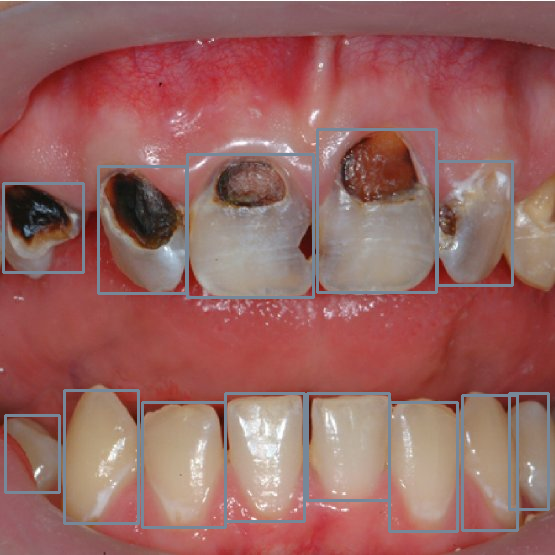

In [ ]:
# Show the detection result
Image.fromarray(detection_result_image)

In [ ]:
out = final_result(detection_result_data)
print(out)


            Smoothness: 61.53846153846154
            Sign of decay: 38.46153846153846
            Bad Breath: 25.0
            Stain level: 26.923076923076923
            Sensitivity: 25.0
